<a href="https://colab.research.google.com/github/norayehia/graduation-facial-occluded-on-vrap-company/blob/main/2NNNnoragoglenetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:








from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import keras
#from keras.layers.core import Layer
import keras.backend as K
import tensorflow as tf
from keras.models import Model

import cv2 
import numpy as np 
from keras.datasets import cifar10 
from keras import backend as K 
from keras.utils import np_utils

import math 
from tensorflow.keras.optimizers import SGD
#from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler
from keras.layers import Activation, Dense 
from keras.layers import Conv2D, MaxPool2D , Dropout ,Input, concatenate ,GlobalAveragePooling2D, AveragePooling2D,Flatten
from keras.layers.core import *


import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# get train and test

In [ ]:
t='/content/drive/MyDrive/graduation2/graduation/Final Dataset/trainset_occluded'
v='/content/drive/MyDrive/graduation2/graduation/Final Dataset/testset_occluded'
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(validation_split=0.2)
generator = datagen.flow_from_directory(t, target_size=(224, 224), batch_size=64, class_mode='categorical', subset='training')
validation_generator = datagen.flow_from_directory(t, # same directory as training data
    target_size=(224, 224), batch_size=64, class_mode='categorical', subset='validation')



Found 9480 images belonging to 7 classes.
Found 2365 images belonging to 7 classes.


In [ ]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [ ]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [ ]:
input_layer = Input(shape=(224, 224, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)








x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')


x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')




x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(7, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(7, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(7, activation='softmax', name='output')(x)


y = tf.keras.layers.Concatenate()([x, x1, x2])


from keras.layers import Lambda
from keras import backend as K

def get_mean(x):
    x = K.reshape(x, (-1, 3,7))
    return K.mean(x, axis=1)

y = Lambda(get_mean, name="lambda_layer")(y)

# y = Lambda(get_mean)(y)
  

In [ ]:
epochs = 100
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

#model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model = Model(input_layer, y, name='inception_v1')
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# model.call(list(generator)[0])
#chan batch to 256
history = model.fit(generator, validation_data=validation_generator ,epochs=epochs)


Epoch 1/100
149/149 [==============================] - 2053s 14s/step - loss: 1.9731 - accuracy: 0.1830 - val_loss: 1.8930 - val_accuracy: 0.1873
Epoch 2/100
149/149 [==============================] - 79s 530ms/step - loss: 1.8542 - accuracy: 0.2303 - val_loss: 1.9173 - val_accuracy: 0.1869
Epoch 3/100
149/149 [==============================] - 79s 532ms/step - loss: 1.7573 - accuracy: 0.2943 - val_loss: 1.7265 - val_accuracy: 0.3573
Epoch 4/100
149/149 [==============================] - 79s 532ms/step - loss: 1.6374 - accuracy: 0.3634 - val_loss: 1.5889 - val_accuracy: 0.4465
Epoch 5/100
149/149 [==============================] - 80s 533ms/step - loss: 1.5750 - accuracy: 0.3978 - val_loss: 1.6192 - val_accuracy: 0.3928
Epoch 6/100
149/149 [==============================] - 79s 530ms/step - loss: 1.5237 - accuracy: 0.4158 - val_loss: 1.6670 - val_accuracy: 0.4085
Epoch 7/100
149/149 [==============================] - 79s 529ms/step - loss: 1.4788 - accuracy: 0.4269 - val_loss: 1.6533 -

In [ ]:
##validation_generator
#history = model.fit(generator,validation_data=validation_generator, epochs=epochs, batch_size=256)


In [ ]:

model.save("scramy_googlenet2")

INFO:tensorflow:Assets written to: scramy_googlenet2/assets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv_1_7x7/2 (Conv2D)           (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling2D) (None, 56, 56, 64)   0           conv_1_7x7/2[0][0]               
__________________________________________________________________________________________________
conv_2a_3x3/1 (Conv2D)          (None, 56, 56, 64)   4160        max_pool_1_3x3/2[0][0]           
_______________________________________________________________________________________

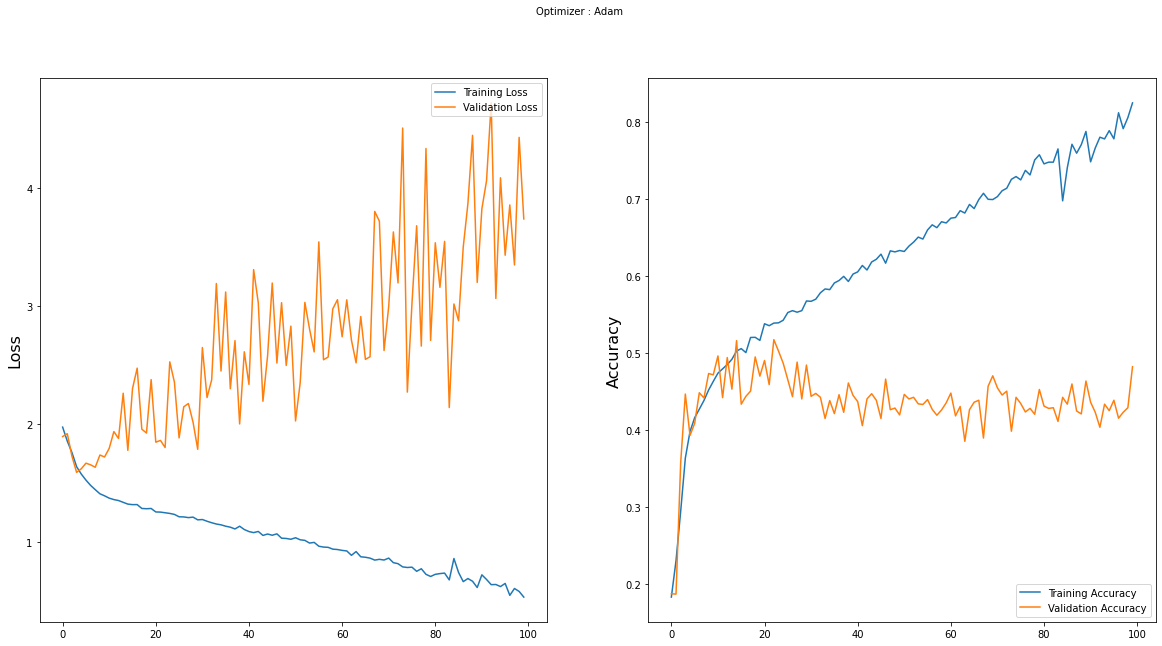

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/ملفات/scramy_googlenet2")

In [ ]:
test_dir ="/content/drive/MyDrive/graduation2/graduation/Final Dataset/testset_occluded"

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = reconstructed_model.predict_generator(test_generator,steps = nb_samples)

In [ ]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

Found 3626 images belonging to 7 classes.


In [ ]:
reconstructed_model.evaluate(test_generator)

3626/3626 [==============================] - 605s 167ms/step - loss: 2.2495 - accuracy: 0.5328


[2.2494564056396484, 0.5328185558319092]

In [ ]:
y_true = test_generator.classes

In [ ]:
y_true

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
y_pred_prob2 =reconstructed_model.predict(test_generator)

In [ ]:
y_pred2 = tf.argmax(y_pred_prob2, axis=-1)

In [ ]:
classes = ['Surprise', 'Fear', 'Disgust', 'Happy', 'Sad', 'Anger', 'Neutral']

In [ ]:
print(classification_report(y_true, y_pred2, target_names = classes))

              precision    recall  f1-score   support

    Surprise       0.65      0.67      0.66       525
        Fear       0.76      0.51      0.62       536
     Disgust       0.78      0.67      0.73       221
       Happy       0.47      0.68      0.56       500
         Sad       0.47      0.49      0.48       739
       Anger       0.34      0.30      0.32       527
     Neutral       0.51      0.51      0.51       578

    accuracy                           0.53      3626
   macro avg       0.57      0.55      0.55      3626
weighted avg       0.55      0.53      0.53      3626



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred2)
cm

array([[350,  22,   4,  39,  26,  41,  43],
       [ 29, 276,   2,  52,  64,  30,  83],
       [ 26,   0, 149,  16,   9,  15,   6],
       [ 27,  10,   4, 341,  45,  40,  33],
       [ 30,  15,  21, 129, 363, 130,  51],
       [ 49,  12,   1, 102, 139, 160,  64],
       [ 30,  26,   9,  39, 120,  61, 293]])

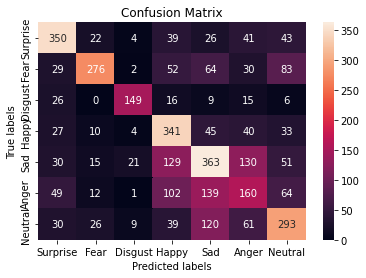

In [ ]:
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);

In [ ]:
training_scores = reconstructed_model.evaluate(generator)
print("Accuracy = ", training_scores[1])

149/149 [==============================] - 1723s 12s/step - loss: 0.4026 - accuracy: 0.8614
Accuracy =  0.8613923788070679


In [ ]:
validation_scores = reconstructed_model.evaluate(validation_generator)
print("Accuracy = ", validation_scores[1])

37/37 [==============================] - 458s 13s/step - loss: 3.7401 - accuracy: 0.4820
Accuracy =  0.48202958703041077
